In [1]:
from highlighting_atoms.highlighting_atoms import highlighter
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

In [23]:
# !git clone https://github.com/phi-grib/highlighting_atoms

In [22]:
# !pip install .

In [105]:
df=PandasTools.LoadSDF('caco2.sdf',smilesName='Smiles')

In [106]:
def fingerprints_inputs2(dataframe):
        X=np.array([GetMorganFingerprintAsBitVect(mol,radius=2,nBits=2048,useFeatures=True) for mol in [Chem.MolFromSmiles(m) for m in list(dataframe.Smiles)]])
        y=dataframe.activity.astype('float')
        return X,y

X,y=fingerprints_inputs2(df)

In [125]:
model=RandomForestRegressor(random_state=46).fit(X,y)

In [126]:
columns=[f'fp_{i}' for i in range(2048)]

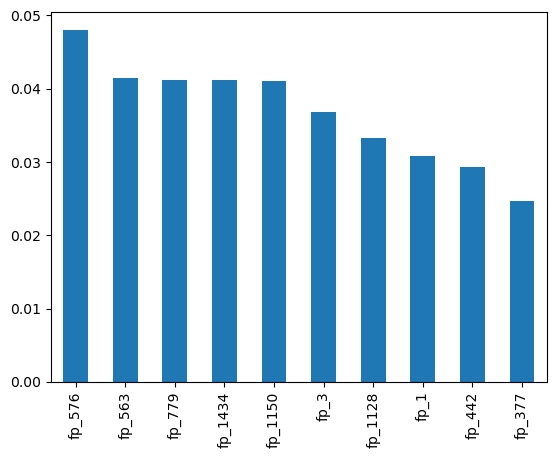

In [127]:
imp=pd.Series(data=model.feature_importances_,index=columns).sort_values(ascending=False)
imp[:10].plot.bar();

In [128]:
df_fp=pd.DataFrame(X,columns=columns)

indexes=df_fp[(df_fp.fp_3==1)&(df_fp.fp_779)].index.values

In [129]:
mols=df.loc[indexes,'Smiles'].tolist()

In [130]:
mols

['CC(C)(C)NC(=O)[C@@H]1C[C@@H]2CCCC[C@@H]2CN1C[C@@H](O)[C@H](Cc1ccccc1)NC(=O)[C@H](CC(N)=O)NC(=O)c1ccc2ccccc2n1',
 'C/C=C/C[C@@H](C)[C@@H](O)[C@H]1C(=O)N[C@@H](CC)C(=O)N(C)CC(=O)N(C)[C@@H](CC(C)C)C(=O)N[C@@H](C(C)C)C(=O)N(C)[C@@H](CC(C)C)C(=O)N[C@@H](C)C(=O)N[C@H](C)C(=O)N(C)[C@@H](CC(C)C)C(=O)N(C)[C@@H](CC(C)C)C(=O)N(C)[C@@H](C(C)C)C(=O)N1C',
 'CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccc(O)cc3)C(=O)N2[C@H]1C(=O)O',
 'CC(C)(C)S(=O)(=O)C[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1c[nH]cn1)C(=O)N[C@@H](CC1CCCCC1)[C@@H](O)[C@@H](O)C1CC1',
 'O=C(N[C@H](CO)[C@H](O)c1ccc([N+](=O)[O-])cc1)C(Cl)Cl']

In [131]:
highlighter_instance=highlighter([mols[0]])

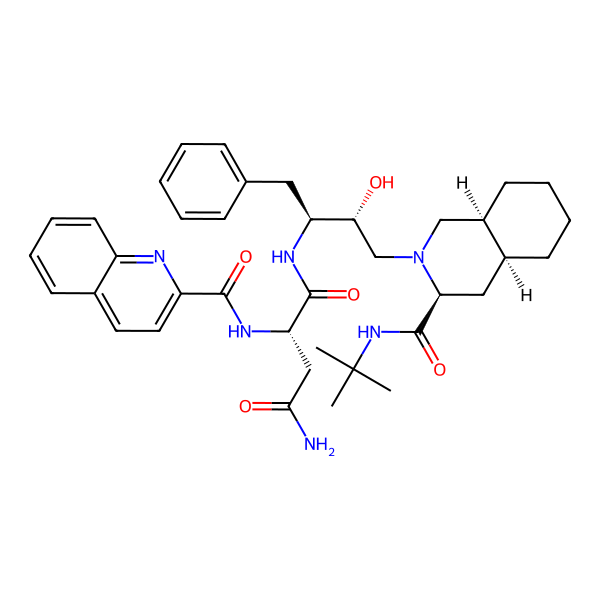

In [132]:
highlighter_instance.render_image(number=0,indexes=False)

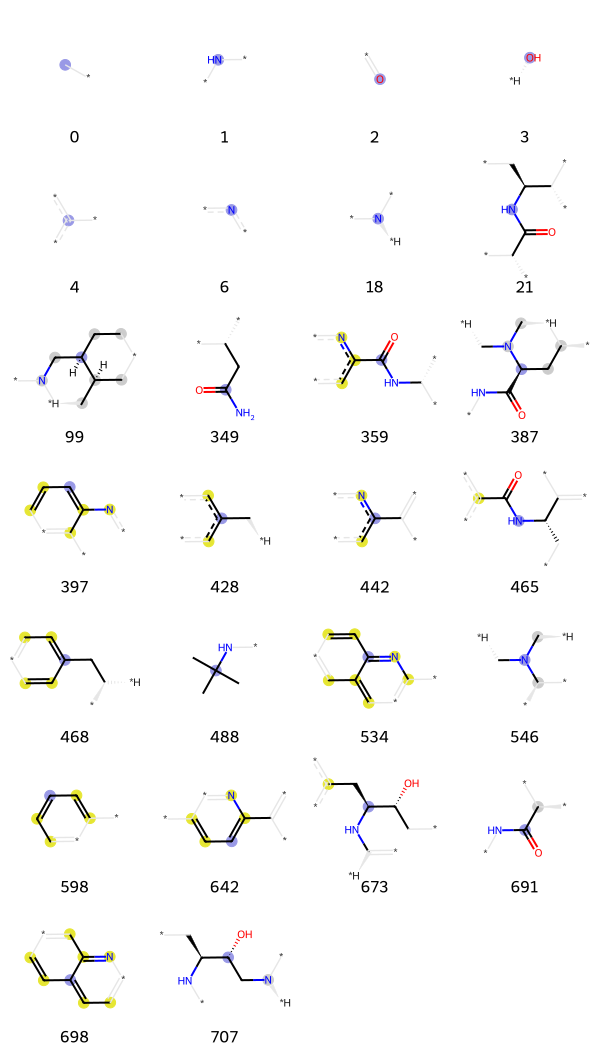

In [133]:
highlighter_instance.fragmentation(type='morgan',n=26,number=0)[0] #you can also introduce a dictionary with fp hyperparameters, for example --> hyper_finger={'radius':2 , 'nBits':2048}

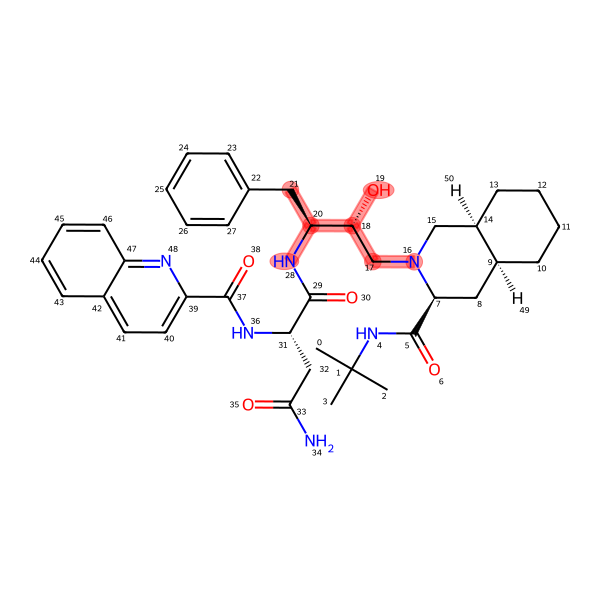

In [134]:
highlighter_instance = highlighter([mols[0]])

highlighter_instance.highlighting(type='morgan',fingerprint_numbers=[[707]])

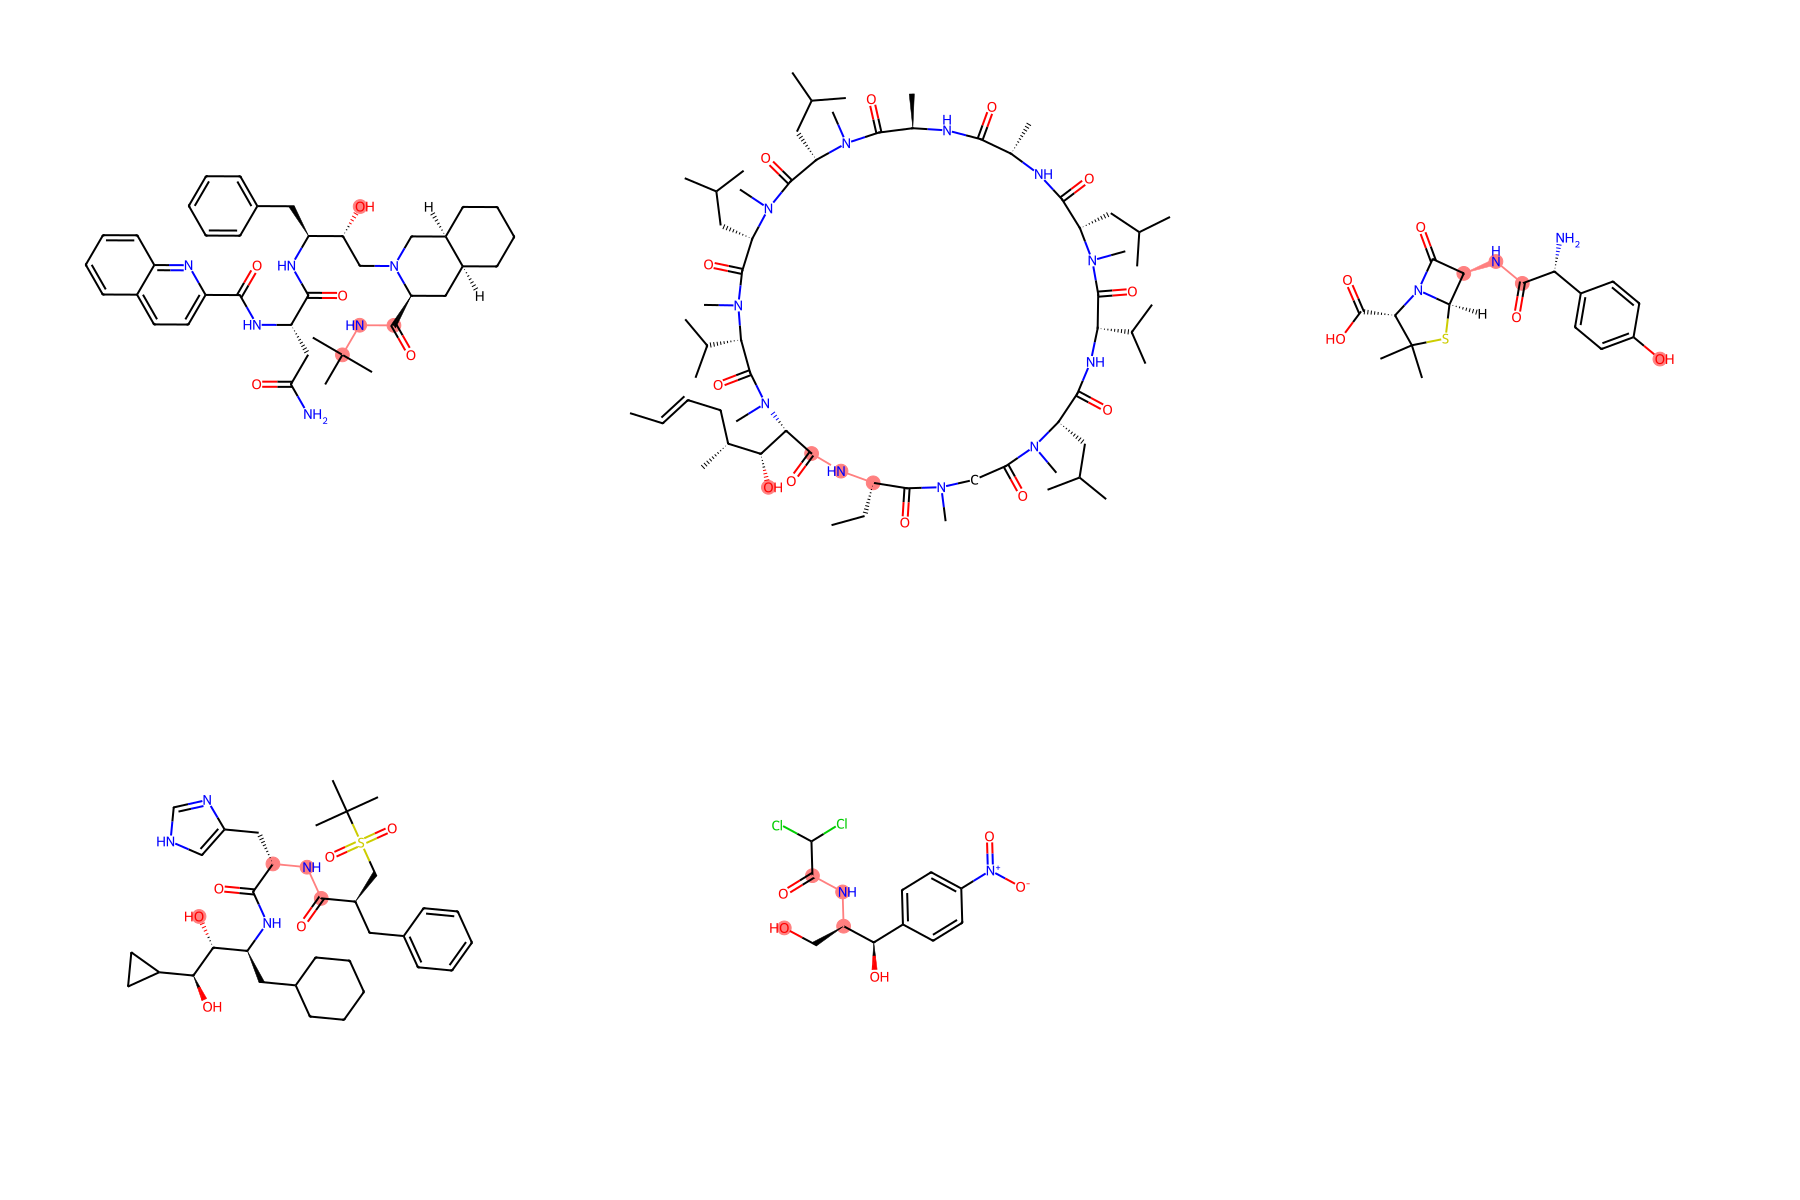

In [123]:
highlighter_instance = highlighter(mols)

highlighter_instance.highlighting(fingerprint_numbers=[[3,779],[3,779],[3,779],[3,779],[3,779]])